In [ ]:
import numpy as np
from matplotlib import pylab as plt
from scipy.optimize import curve_fit
from google.colab import drive
from matplotlib import style

# Si se ejecuta en collab debe descomentar esta parte para leer el archivo con los datos
# drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura de datos

In [ ]:
#Recolecta los datos en un arreglo de numpy
datos=np.genfromtxt('datos-carro-1d.csv', skip_header=5, delimiter=',', missing_values=np.nan)

t=datos[:,0]
x=datos[:,1]
vx=datos[:,3]
ax=datos[:,5]

In [1]:
# Definimos una variable para almacenar el índice de cambio en la velocidad
indice = 0

# Umbral de velocidad mínima 0.1 m/s
umbral_velocidad = 0.1

for i in range(1, len(vx)):
    # Si la velocidad actual es mayor que el umbral y la velocidad anterior es menor o igual al umbral
    if vx[i] > umbral_velocidad and vx[i-1] <= umbral_velocidad:
        indice = i
        break

# Tiempo en que empieza a moverse el carro
t0=t[indice]


#Gráfica
plt.style.use('Solarize_Light2')
plt.plot(t, x, '.')
plt.plot(t0, x[indice],'*', color='r')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición horizontal (m)')
plt.title('Posición horizontal del carro en función del tiempo')
plt.show()

print(f"El carro comenzó a moverse en el segundo {t0: .2f}, con indice {indice}")

NameError: ignored

## Se redefinen las variables para cuando empieza el movimiento

In [ ]:
t=datos[indice:,0]
x=datos[indice:,1]
vx=datos[indice:,3]
ax=datos[indice:,5]

# Cálculo de derivada numérica

In [ ]:
dt = t[1:] - t[:-1]  # arreglo de intervalos de tiempo
dx = x[1:] - x[:-1]  # arreglo de intervalos de posición
vel_diff_central = np.zeros_like(dx)  # arreglo de velocidades

# CALCULAR DERIVADA PUNTO A PUNTO CON ALGORITMO DE DERIVADA CENTRAL
for i in range(1, len(dx)):
    vel_diff_central[i] = (x[i+1] - x[i-1]) / (2*dt[i])

vel_diff_central = np.delete(vel_diff_central, 0) # eliminar el primer punto en el cuál no se puede calcular la vel instantanea

# AJUSTE LINEAL DEL RESULTADO USANDO curve_fit
def ajuste_vel(t,v0, a):
    f=v0+a*t
    return f

vel_cons, vel_cov = curve_fit(ajuste_vel, t[1:-1], vel_diff_central) #curve_fit arrija un arreglo con las constantes y la matriz de covarianza

# Definimos las constantes del ajuste y sus incertidumbre
v0_ajuste_vel = vel_cons[0]
v0_ajuste_vel_error = np.power(vel_cov[0,0], 0.5)
ax_ajuste_vel = vel_cons[1]
ax_ajuste_vel_error = np.power(vel_cov[1,1], 0.5)

# Gráfica de velocidades


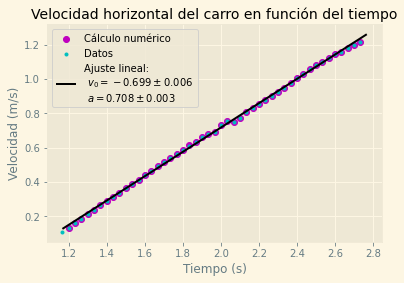

In [ ]:
plt.scatter(t[1:-1],vel_diff_central, marker='o', color='m', label='Cálculo numérico') # velocidad calculada numericamente
plt.scatter(t, vx, marker='.', color='c', label='Datos')                               # velocidad de los datos experimentales
plt.plot(t, ajuste_vel(t,v0_ajuste_vel,ax_ajuste_vel), color='k', label=f'Ajuste lineal: \n $v_0={v0_ajuste_vel: .3f} \pm {v0_ajuste_vel_error: .3f}$ \n $a={ax_ajuste_vel: .3f} \pm {ax_ajuste_vel_error: .3f}$')          # velocidad teórica (ajuste lineal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad horizontal del carro en función del tiempo', size=14)
plt.legend()
plt.show()

# Otros calculos de la aceleración

In [ ]:
# AJUSTE CUADRATICO DE LA POSICIÓN
def ajuste_pos(t,x0,v0x,ax):
    f=x0+v0x*t+ax*t**2/2
    return f

pos_cons,pos_cov=curve_fit(ajuste_pos,t,x) 

# DEFINIMOS ARREGLOS CON LOS VALORES DE LA ACELERACIÓN Y SUS ERRORES
ax_ajuste_pos = pos_cons[2]
ax_ajuste_pos_array = np.full(len(t), ax_ajuste_pos) # Aceleración del ajuste de la posición
ax_ajuste_pos_error = np.power(pos_cov[2,2], 0.5)

ax_ajuste_vel_array = np.full(len(t), ax_ajuste_vel) # Aceleración del ajuste de la velocidad

axprom = np.full(len(t), np.nanmean(ax)) # Aceleración de los datos de la aceleración
axprom_error = np.power(np.nanstd(ax), 0.5)

# Gráfica de aceleraciones

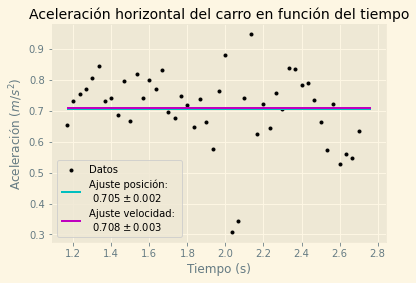

In [ ]:
plt.scatter(t, ax, marker='.', color='k',label = 'Datos')                                                                          # Aceleración de los datos experimentales
plt.plot(t, ax_ajuste_pos_array, color='c', label = f'Ajuste posición: \n ${ax_ajuste_pos: .3f} \pm {ax_ajuste_pos_error: .3f}$')  # Aceleración del ajuste en la posición
plt.plot(t, ax_ajuste_vel_array, color='m', label = f'Ajuste velocidad: \n ${ax_ajuste_vel: .3f} \pm {ax_ajuste_vel_error: .3f}$') # Aceleración del ajuste en la velocidad
plt.xlabel('Tiempo (s)')
plt.ylabel(r'Aceleración $(m/s^2)$')
plt.title('Aceleración horizontal del carro en función del tiempo', size=14)
plt.legend()
plt.show()

# Gráfica de comparación entre los 3 valores de la aceleración (es algo adicional, no  me bajes por esto 😞)

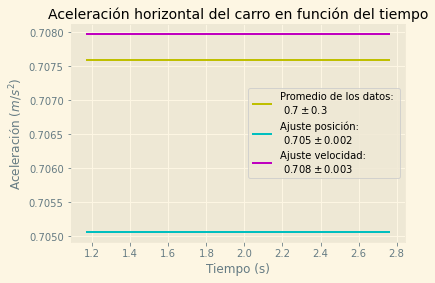

In [ ]:
plt.plot(t, axprom, color='y', label = f'Promedio de los datos: \n $ {np.nanmean(ax): .1f} \pm {axprom_error: .1f}$')
plt.plot(t, ax_ajuste_pos_array, color='c', label = f'Ajuste posición: \n ${ax_ajuste_pos: .3f} \pm {ax_ajuste_pos_error: .3f}$')
plt.plot(t, ax_ajuste_vel_array, color='m', label = f'Ajuste velocidad: \n ${ax_ajuste_vel: .3f} \pm {ax_ajuste_vel_error: .3f}$')
plt.xlabel('Tiempo (s)')
plt.ylabel(r'Aceleración $(m/s^2)$')
plt.title('Aceleración horizontal del carro en función del tiempo', size=14)
plt.legend()
plt.show()